### World happiness report Analysis,predictiomn and visualization

In the blogs-post,I will go through whole process of creating machine learning model on the World Happiness Report.It provide information on the GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Trust Government Corruption describe the extent to which these factor contribute in providing the Happiness in each country.

Description:The World Happiness Report is a publication of the United Nations Sustainable Development Solution Network. it contains articles and ranking of national happiness based on rating of their lives.The World Happiness Report is a landmark survey of the state of global happiness.The first report was given in 2012,secound in 2013,the third in 2015 and the forth in 2016 update.The World Happiness 2017,which rank 155 countries by their Happiness level,may be released at the United Nations at an event which celebrating International day of Happiness on 20th March.The report flowed to gain global recognition as government,organizations and civil society increasingly use happiness indicator to inform their policy making decisions.Leading experts across in the field of economics, psychology,survey analysis ,national statistics,health,public-policies and more describes how measurements of well being can be uesd effectively to access the growth of nations.The report reviwed the state of happiness in the world today and showed how the new brands of science of happiness explain personal and national variations in happiness.So i will be building the model on happiness score.

Dystopia:Dystopia is an imaginary country that had a world's least happy people.The purpose for establishing Dystopia is to have a benchmark against which all countries can be favorably compared, no country can perform poorly than dystopia.The lowest scores observed for the six-key variables characterize dystopia.Since life would be inpleasant in a country with world cheapest income,cheapest life expectancy,lowest generosity,most curruption,no freedom and no support.

## breakdown
1.importing libraries,
2.loading the dataset,
3.understanding the happiness problem and the dataset,
4.data visualization,
5.data modeling,
6.feature engginering.


# 1.plot a correlation map for all numeric variable
2.Country
3.Region	
4.Happiness Rank	
5.Happiness Score
6.Standard Error	
7.Economy (GDP per Capita)
8.Family
9.Health (Life Expectancy)	
10.Freedom	Trust (Government Corruption)
11.Generosity	
12.Dystopia Residual


### undestanding the happiness score problem

world happiness report is a survey by the united nation which shows the national happiness based on the ratings of the 
lifestyle,the survey is taken in 158 countries with different using different parameters,Here  the target variable is Happiness score,Since this is a regression problem we will go with a regression model
interestingly,machine learning models can be deployed to predict what is the real cause of happiness amongh citizens 

In [273]:
#importing libraries
import pandas as pd #importing data frames
import numpy as np  #importing mathematical function
import seaborn as sns #importing data visualization lib
import matplotlib.pyplot as plt  #importing data visualization lib
%matplotlib inline
import warnings   #to avoid warnings
warnings.filterwarnings('ignore')

In [274]:
df=pd.read_csv("happiness_report.csv") #loading the dataset

In [275]:
df #checking df data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [276]:
print(df.shape)  #to check the shape row and columns

(158, 12)


In [277]:
print(df.columns)   #to check the column id 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [278]:
df.dtypes #checking the data types

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [279]:
df.isnull().sum()  #checking to see if there are any null values so we can clean the data accorrdingly,
                                   #in this we dont have any null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [280]:
df.isnull().values.any() #there is not missing value in this data 
                           #this is another method to check null values fasle means there are no null

False

In [281]:
# checking for duplicate values
df.duplicated().sum()

0

In [282]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


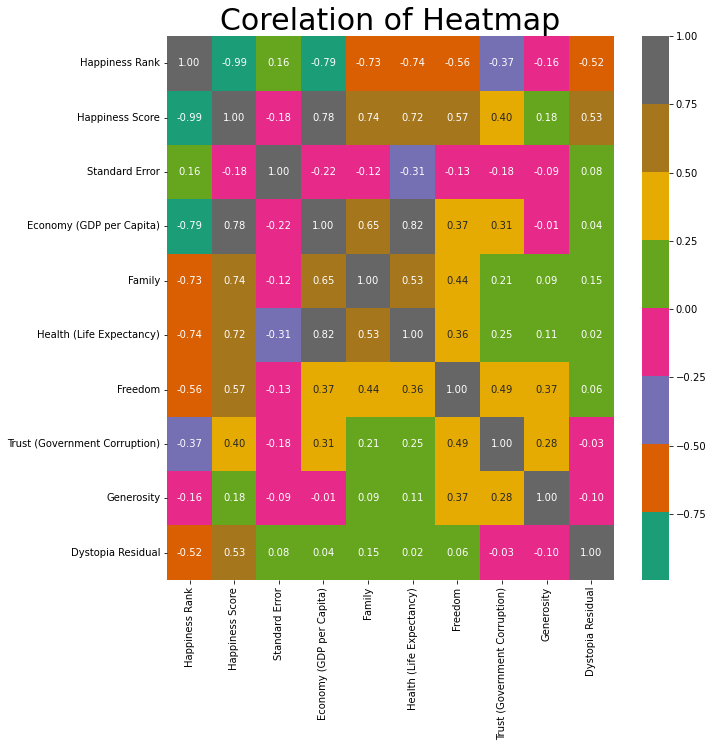

In [283]:
#checking corelation of data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Dark2')
plt.title('Corelation of Heatmap',fontsize=30)
plt.show()

In [284]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [285]:
df= df[['Happiness Rank', 'Country','Region','Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)']]


In [286]:
df.columns

Index(['Happiness Rank', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

# EDA

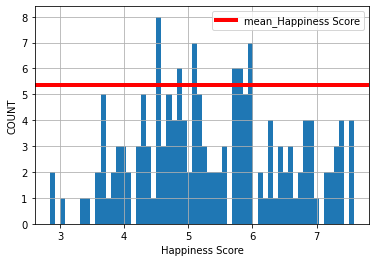

In [287]:
#plotting cost with histogram
COST=df['Happiness Score'].hist(bins=60)
mean_val=np.mean(df['Happiness Score'])
plt.axhline(mean_val,linewidth=4,color='r',label='mean_Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('COUNT')
plt.legend()
plt.show()

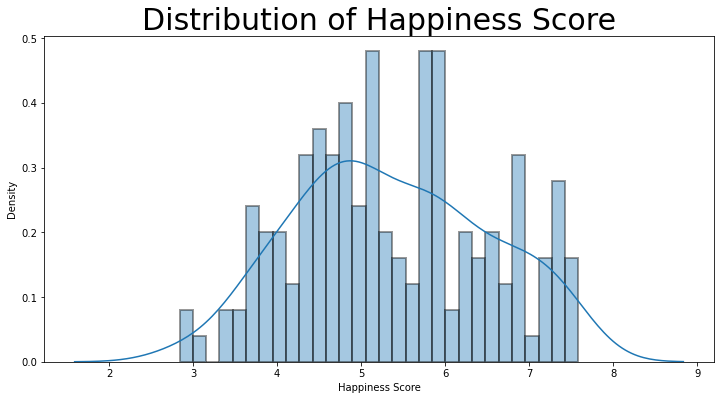

In [288]:
#plotting using distplot to see Happiness Score
plt.figure(figsize=(12,6))
sns.distplot(df['Happiness Score'],bins=30,hist_kws=dict(edgecolor='black',linewidth=2))
plt.title('Distribution of Happiness Score',fontsize=30)
plt.xlabel('Happiness Score')
plt.show()

the mean happiness score is under 6

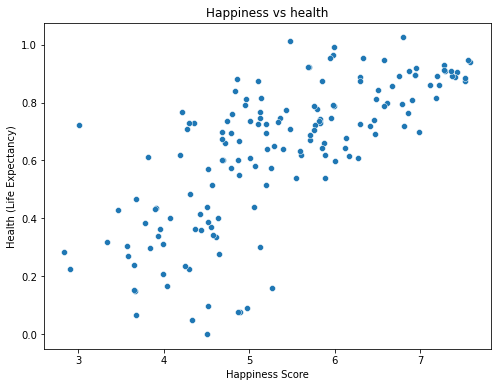

In [289]:
#checking the correlation btw happiness score and health as they are highly correlated
plt.figure(figsize=(8,6))
sns.scatterplot(x='Happiness Score',y='Health (Life Expectancy)',data=df,palette='GnBu')
plt.title('Happiness vs health')
plt.show()

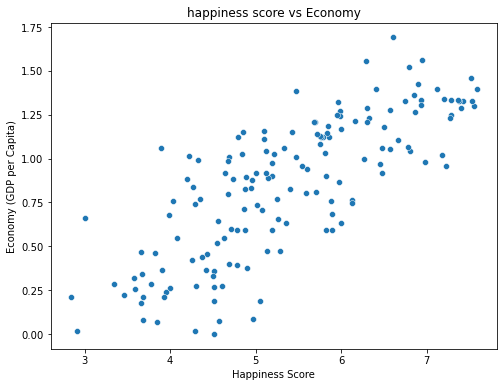

In [290]:
#checking the correlation btw happiness score and Economy as they are highly correlated
plt.figure(figsize=(8,6))
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df,palette='GnBu')
plt.title('happiness score vs Economy')
plt.show()

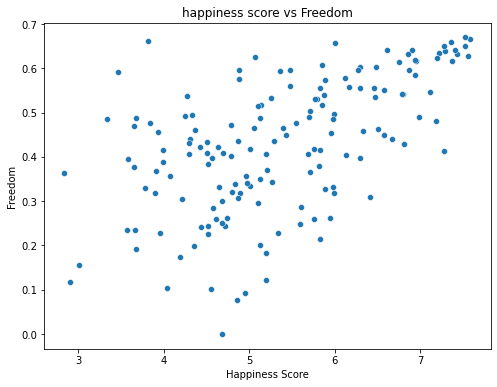

In [291]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Happiness Score',y='Freedom',data=df,palette='GnBu')
plt.title('happiness score vs Freedom')
plt.show()

Text(0.5, 1.0, 'correlation with target variable')

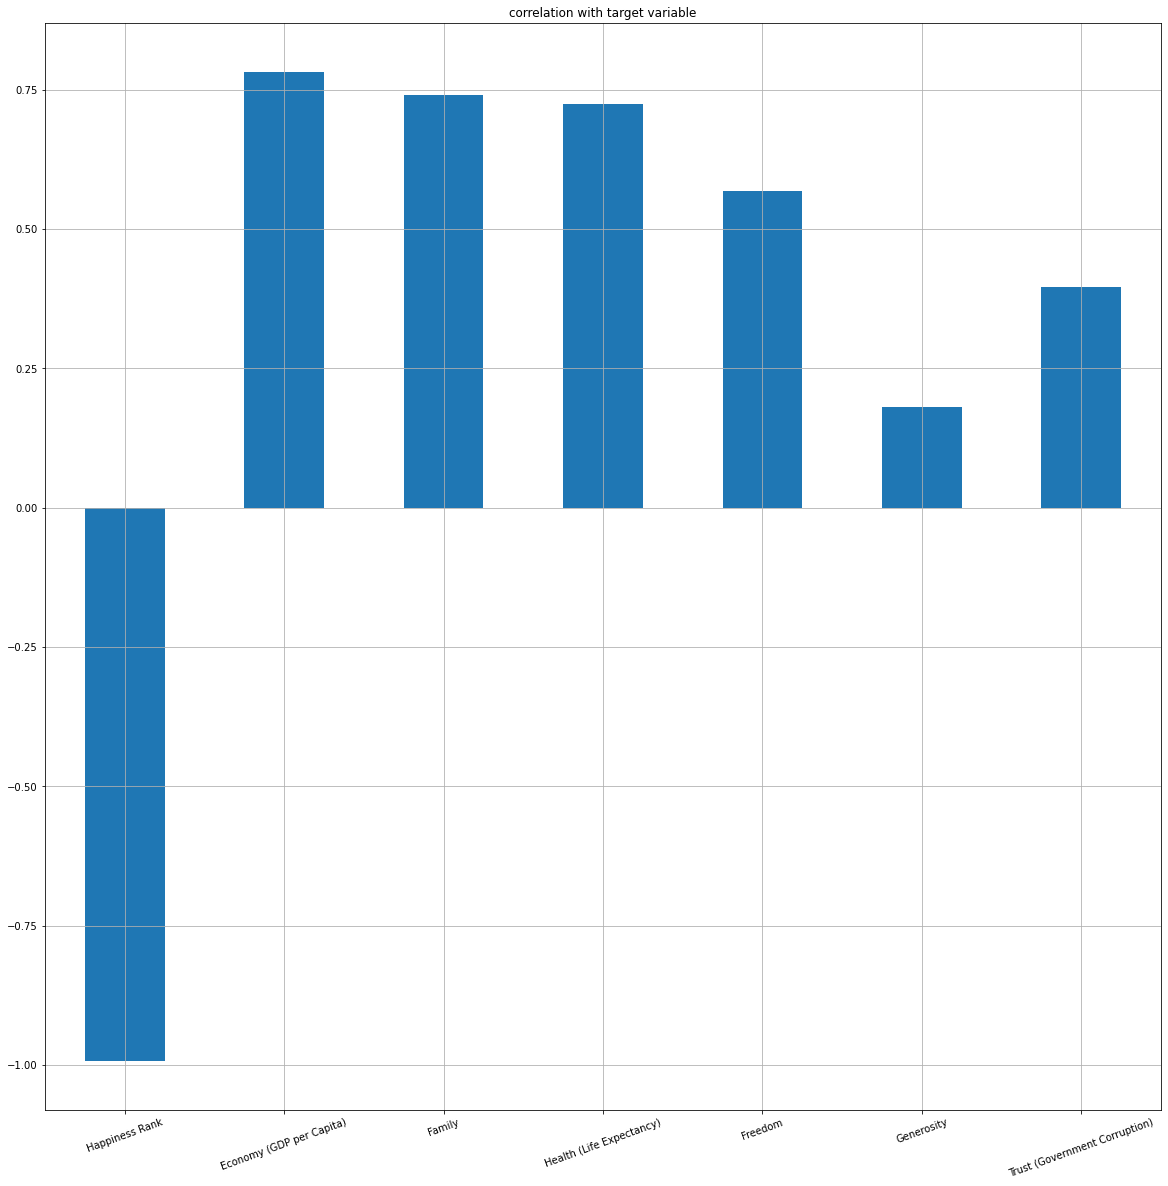

In [292]:
#Checking corelattion with target variable
plt.figure(figsize=(20,20))
df.drop('Happiness Score',axis=1).corrwith(df['Happiness Score']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

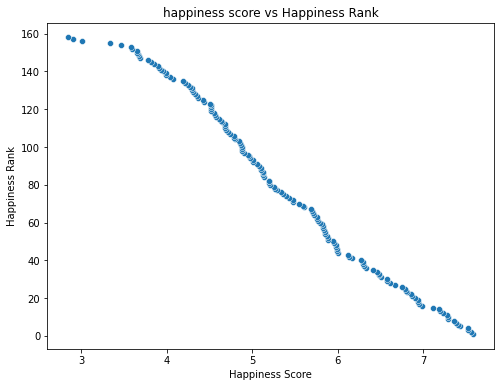

In [293]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Happiness Score',y='Happiness Rank',data=df,palette='Dark')
plt.title('happiness score vs Happiness Rank')
plt.show()

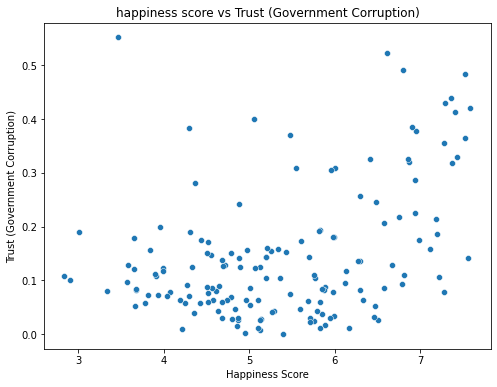

In [294]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Happiness Score',y='Trust (Government Corruption)',data=df,palette='Dark')
plt.title('happiness score vs Trust (Government Corruption)')
plt.show()

In [295]:
df.columns

Index(['Happiness Rank', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)'],
      dtype='object')

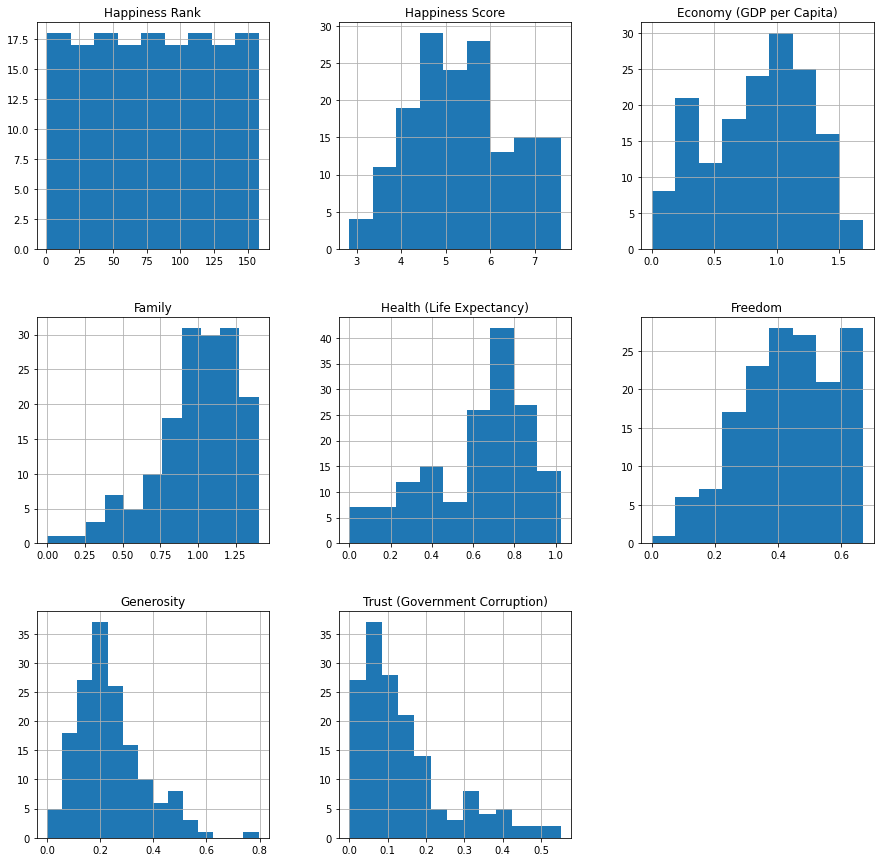

In [296]:
# checking the frequency distribution of the variables

df.hist(bins='auto', figsize=(15,15));

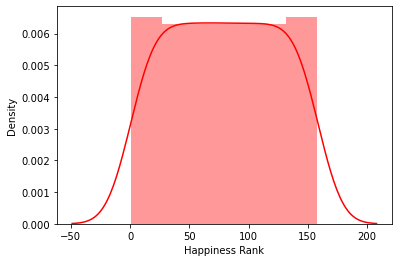

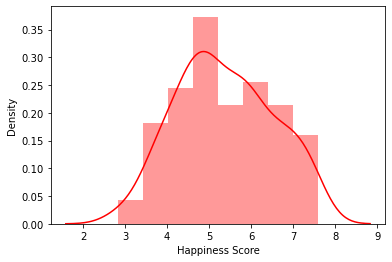

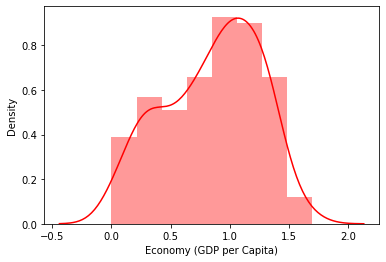

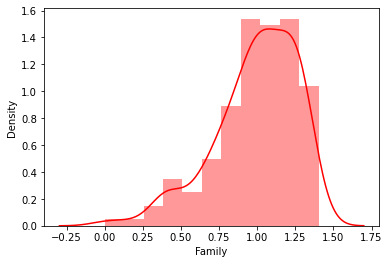

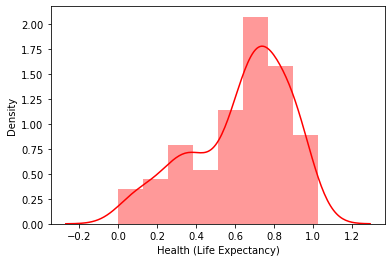

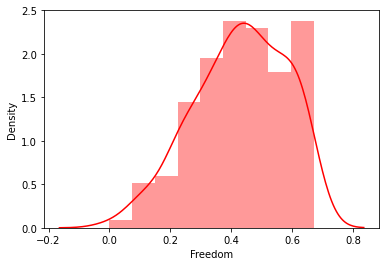

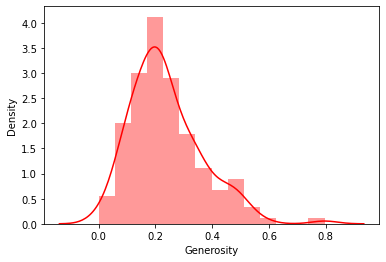

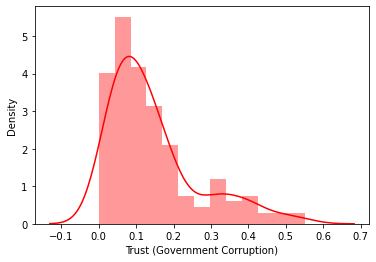

In [297]:
#CHECKING SKEWNESS
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [298]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Generosity                       1.001961
Trust (Government Corruption)    1.385463
dtype: float64

In [299]:
#removing skewness by cubic root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [300]:
df

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Switzerland,Western Europe,7.587,1.39651,1.105076,0.980083,0.66557,0.544775,0.647904
1,2,Iceland,Western Europe,7.561,1.30232,1.119283,0.982302,0.62877,0.660530,0.376098
2,3,Denmark,Western Europe,7.527,1.32548,1.108089,0.956334,0.64938,0.584286,0.695392
3,4,Norway,Western Europe,7.522,1.45900,1.099986,0.960171,0.66973,0.589059,0.604177
4,5,Canada,North America,7.427,1.32629,1.097684,0.967498,0.63297,0.676838,0.574082
...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.918031,0.753988,0.59201,0.475689,0.742906
154,155,Benin,Sub-Saharan Africa,3.340,0.28665,0.707311,0.683349,0.48450,0.427317,0.283019
155,156,Syria,Middle East and Northern Africa,3.006,0.66320,0.780185,0.897081,0.15684,0.686870,0.434810
156,157,Burundi,Sub-Saharan Africa,2.905,0.01530,0.746424,0.607282,0.11850,0.444151,0.317207


In [301]:
country=df['Country']
country=pd.get_dummies(country,drop_first=True)

In [302]:
df['Region']

0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object

In [303]:
region=df['Region']
region=pd.get_dummies(region,drop_first=True)

In [304]:
df_temp=df.drop(columns=['Country','Region'])


In [305]:
df_temp

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,7.587,1.39651,1.105076,0.980083,0.66557,0.544775,0.647904
1,2,7.561,1.30232,1.119283,0.982302,0.62877,0.660530,0.376098
2,3,7.527,1.32548,1.108089,0.956334,0.64938,0.584286,0.695392
3,4,7.522,1.45900,1.099986,0.960171,0.66973,0.589059,0.604177
4,5,7.427,1.32629,1.097684,0.967498,0.63297,0.676838,0.574082
...,...,...,...,...,...,...,...,...
153,154,3.465,0.22208,0.918031,0.753988,0.59201,0.475689,0.742906
154,155,3.340,0.28665,0.707311,0.683349,0.48450,0.427317,0.283019
155,156,3.006,0.66320,0.780185,0.897081,0.15684,0.686870,0.434810
156,157,2.905,0.01530,0.746424,0.607282,0.11850,0.444151,0.317207


In [306]:
df_temp=pd.concat([df_temp,country,region],axis=1)

In [307]:
df_temp

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Albania,Algeria,...,Zimbabwe,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,1,7.587,1.39651,1.105076,0.980083,0.66557,0.544775,0.647904,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7.561,1.30232,1.119283,0.982302,0.62877,0.660530,0.376098,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,7.527,1.32548,1.108089,0.956334,0.64938,0.584286,0.695392,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,7.522,1.45900,1.099986,0.960171,0.66973,0.589059,0.604177,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,7.427,1.32629,1.097684,0.967498,0.63297,0.676838,0.574082,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.22208,0.918031,0.753988,0.59201,0.475689,0.742906,0,0,...,0,0,0,0,0,0,0,0,1,0
154,155,3.340,0.28665,0.707311,0.683349,0.48450,0.427317,0.283019,0,0,...,0,0,0,0,0,0,0,0,1,0
155,156,3.006,0.66320,0.780185,0.897081,0.15684,0.686870,0.434810,0,0,...,0,0,0,0,1,0,0,0,0,0
156,157,2.905,0.01530,0.746424,0.607282,0.11850,0.444151,0.317207,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

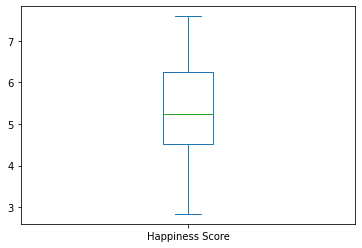

In [308]:
#plotting outliners outliner meaning extra data we need to remove it
df['Happiness Score'].plot.box()

<AxesSubplot:>

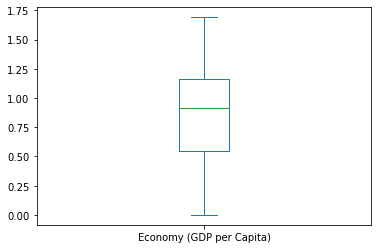

In [309]:
df['Economy (GDP per Capita)'].plot.box()

<AxesSubplot:>

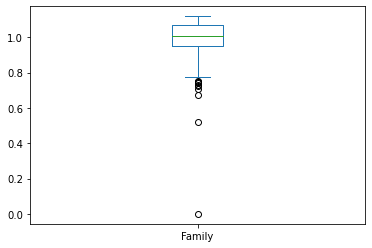

In [310]:
df['Family'].plot.box()

<AxesSubplot:>

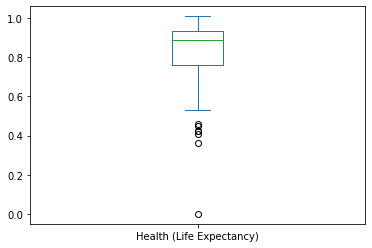

In [311]:
df['Health (Life Expectancy)'].plot.box()

<AxesSubplot:>

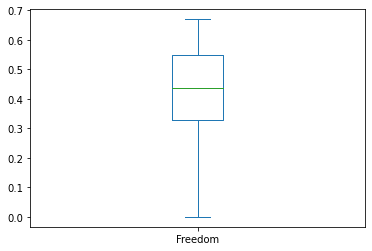

In [312]:
df['Freedom'].plot.box()

<AxesSubplot:>

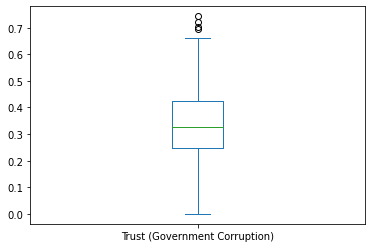

In [313]:
df['Trust (Government Corruption)'].plot.box()

In [314]:
df.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Switzerland,Western Europe,7.587,1.39651,1.105076,0.980083,0.66557,0.544775,0.647904
1,2,Iceland,Western Europe,7.561,1.30232,1.119283,0.982302,0.62877,0.660530,0.376098
2,3,Denmark,Western Europe,7.527,1.32548,1.108089,0.956334,0.64938,0.584286,0.695392
3,4,Norway,Western Europe,7.522,1.45900,1.099986,0.960171,0.66973,0.589059,0.604177
4,5,Canada,North America,7.427,1.32629,1.097684,0.967498,0.63297,0.676838,0.574082


### analysis conclusion
1) the higher the gdp, the higher the happiness score
2) health aslo affects happiness score
3) family aslo affects the happines score
4) happines rank is inversely propersional to the happiness score



# Modeling

In [315]:
new_df_x = df_temp.drop(['Happiness Score'],axis=1)
new_df_y=df_temp['Happiness Score']
new_df.head()
#new_happiness.info()


,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [316]:
new_df_x

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Albania,Algeria,Angola,...,Zimbabwe,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,1,1.39651,1.105076,0.980083,0.66557,0.544775,0.647904,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.30232,1.119283,0.982302,0.62877,0.660530,0.376098,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1.32548,1.108089,0.956334,0.64938,0.584286,0.695392,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1.45900,1.099986,0.960171,0.66973,0.589059,0.604177,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1.32629,1.097684,0.967498,0.63297,0.676838,0.574082,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,0.22208,0.918031,0.753988,0.59201,0.475689,0.742906,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,155,0.28665,0.707311,0.683349,0.48450,0.427317,0.283019,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,156,0.66320,0.780185,0.897081,0.15684,0.686870,0.434810,0,0,0,...,0,0,0,0,1,0,0,0,0,0
156,157,0.01530,0.746424,0.607282,0.11850,0.444151,0.317207,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [317]:
y=new_df_y

In [318]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(new_df_x)

In [319]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

In [320]:
print(x_train.shape)
print(x_test.shape)

(110, 173)
(48, 173)


In [321]:
print(y_train.shape)
print(y_test.shape)

(110,)
(48,)


In [327]:
x_train

array([[-1.23864256,  0.49298546,  0.74801527, ..., -0.21530819,
        -0.58222251, -0.39151586],
       [ 0.82233876, -0.50056163, -2.01052865, ...,  4.6445052 ,
        -0.58222251, -0.39151586],
       [ 0.3838321 , -1.17132102,  0.23741862, ..., -0.21530819,
         1.7175564 , -0.39151586],
       ...,
       [-0.64665856,  1.00786309,  0.61592947, ..., -0.21530819,
        -0.58222251,  2.55417492],
       [-0.31777856, -0.08898304,  0.50667705, ..., -0.21530819,
        -0.58222251, -0.39151586],
       [-0.23007723, -0.11113099, -0.39125976, ..., -0.21530819,
        -0.58222251, -0.39151586]])

In [328]:
y_train

22     6.810
116    4.565
96     4.898
82     5.192
55     5.833
       ...  
58     5.813
21     6.853
49     5.948
64     5.709
68     5.589
Name: Happiness Score, Length: 110, dtype: float64

### Model Evaluation  and Prediction


In [357]:
#importing all library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#importing boosting library
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import metrics library
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [358]:
#all algorithm using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Analysis of ", m, " Model")
    print('MAE',mean_absolute_error(y_test,predm))
    print('MSE',mean_squared_error(y_test,predm))
    print("RSME",np.sqrt(mean_squared_error(y_test,predm)))
    print('R2SCORE',r2_score(y_test,predm))
    print('************************************************************************************')
    print('/n')

Analysis of  LinearRegression()  Model
MAE 0.4387354696793772
MSE 0.29593953637217746
RSME 0.5440032503323647
R2SCORE 0.7787074892019881
************************************************************************************
/n
Analysis of  Lasso()  Model
MAE 0.8435500649200085
MSE 1.1162470148638037
RSME 1.0565259177435278
R2SCORE 0.16531225392154125
************************************************************************************
/n
Analysis of  Ridge()  Model
MAE 0.44080163616682383
MSE 0.298825067889706
RSME 0.5466489439207818
R2SCORE 0.7765497967140954
************************************************************************************
/n
Analysis of  ElasticNet()  Model
MAE 0.5861382381829455
MSE 0.5680042375243161
RSME 0.7536605585569116
R2SCORE 0.5752676867493958
************************************************************************************
/n
Analysis of  SVR()  Model
MAE 0.6598839043821139
MSE 0.695756385303859
RSME 0.8341201264229625
R2SCORE 0.47973941131674036
*******

I am going with linear regression as it is giving me good rms value RSME 0.5440032503323647

In [359]:
lr =LinearRegression()

In [360]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred

array([5.11289113, 5.08477001, 4.37906302, 6.80306948, 5.3981533 ,
       5.35750176, 4.33504091, 5.23800689, 6.30364364, 5.78619678,
       5.97811537, 4.8762447 , 5.6951148 , 5.35344175, 4.24460696,
       6.76027489, 6.32805349, 4.4629737 , 6.1944205 , 6.54687301,
       4.1976867 , 5.16200592, 4.74001861, 4.56671594, 6.01612846,
       4.82633218, 6.6193764 , 5.86483445, 5.57267531, 4.57393254,
       5.75453367, 5.02223927, 6.58126106, 3.75843771, 5.1967586 ,
       5.97417143, 6.10524336, 4.07574406, 5.95786907, 5.68850582,
       5.77474504, 5.96459622, 6.45128478, 5.66586325, 5.68221315,
       5.84138674, 4.58060246, 4.47112803])

In [361]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print("RSME",np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2SCORE',r2_score(y_test,y_pred))

MAE 0.4387354696793772
MSE 0.29593953637217746
RSME 0.5440032503323647
R2SCORE 0.7787074892019881


# Concluion 
i have constructed very simple pipeline of predicting happiness from some basic exploratory data analysis to feature engineering. as well as implementing learnings models in the form of LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),
RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor().GDP per capita, freedom to make life choices, and Life expectancy are significant determinants of Happiness score and can be used to predict future scores. that being said,there is quite a lot of room of improvement.for one,more features could be engineered from the data.further more one could squeeze performance out of this pipeline by perhaps using some form of blending a stacking of model.

In [368]:
import pickle

In [369]:
filename='WorldHappinessReport'
pickle.dump(lr,open(filename,'wb'))

In [370]:
a=np.array(y_test)

In [371]:
predicted=np.array(lr.predict(x_test))

In [372]:
df_com=pd.DataFrame({'origianl':a,'predicted':predicted},index=range(len(a)))

In [367]:
df_com

,origianl,predicted
0,5.123,5.112891
1,4.839,5.084770
2,3.655,4.379063
3,7.587,6.803069
4,5.212,5.398153
5,5.605,5.357502
6,3.845,4.335041
7,5.286,5.238007
8,6.901,6.303644
9,6.298,5.786197
